In [68]:
import networkx as nx


def draw(g):
    pos = nx.spring_layout(g, k=g.number_of_nodes()*4)
    nx.draw(g, pos=pos, 
            with_labels=True,
            node_size=4500,
            width=4)
    labels = nx.get_edge_attributes(g, 'weight')
    nx.draw_networkx_edge_labels(g, pos,
                                 edge_labels=labels)
    

def possibile_paths(g, r, cn, paths, total_weight=0):  
    g.nodes[cn]['visited'] = True
    
    last_node = True
    for v, ed in g.adj[cn].items():
        if not g.nodes[v].get('visited'):
            last_node = False
            possibile_paths(g, r, v,
                         paths,
                         total_weight=total_weight+ed['weight'])
    
    if last_node == True:
        paths.append((r, cn, total_weight))
    
    g.nodes[cn]['visited'] = False
    
def all_paths(g):
    paths = []
    for n in g.nodes:
        possibile_paths(g, n, n, paths)
        
    return paths

[('London', 'Belfast', 605),
 ('London', 'Dublin', 659),
 ('Dublin', 'Belfast', 982),
 ('Dublin', 'London', 659),
 ('Belfast', 'Dublin', 982),
 ('Belfast', 'London', 605)]

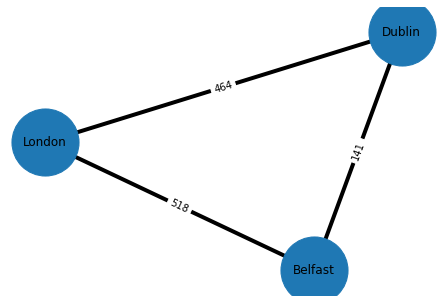

In [69]:
g = nx.Graph()
g.add_weighted_edges_from([('London', 'Dublin', 464), 
                           ('London', 'Belfast', 518), 
                           ('Dublin', 'Belfast', 141)])
draw(g)
all_paths(g)

('Tristram', 'Arbre', 141)
('AlphaCentauri', 'Faerun', 736)


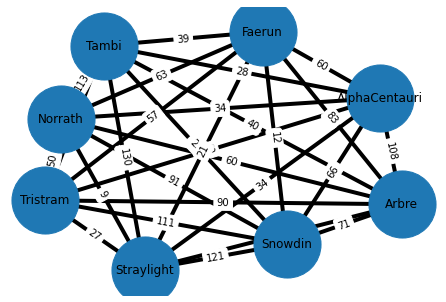

In [70]:
g = nx.Graph()
# I'm too lazy to parse a file
g.add_weighted_edges_from([('AlphaCentauri', 'Snowdin', 66), 
                           ('AlphaCentauri', 'Tambi', 28), 
                           ('AlphaCentauri', 'Faerun', 60), 
                           ('AlphaCentauri', 'Norrath', 34), 
                           ('AlphaCentauri', 'Straylight', 34), 
                           ('AlphaCentauri', 'Tristram', 3), 
                           ('AlphaCentauri', 'Arbre', 108), 
                           ('Snowdin', 'Tambi', 22), 
                           ('Snowdin', 'Faerun', 12), 
                           ('Snowdin', 'Norrath', 91), 
                           ('Snowdin', 'Straylight', 121), 
                           ('Snowdin', 'Tristram', 111), 
                           ('Snowdin', 'Arbre', 71), 
                           ('Tambi', 'Faerun', 39), 
                           ('Tambi', 'Norrath', 113), 
                           ('Tambi', 'Straylight', 130), 
                           ('Tambi', 'Tristram', 35), 
                           ('Tambi', 'Arbre', 40), 
                           ('Faerun', 'Norrath', 63), 
                           ('Faerun', 'Straylight', 21), 
                           ('Faerun', 'Tristram', 57), 
                           ('Faerun', 'Arbre', 83), 
                           ('Norrath', 'Straylight', 9), 
                           ('Norrath', 'Tristram', 50), 
                           ('Norrath', 'Arbre', 60), 
                           ('Straylight', 'Tristram', 27), 
                           ('Straylight', 'Arbre', 81), 
                           ('Tristram', 'Arbre', 90)])

draw(g)

paths = all_paths(g)

import operator
print(min(paths, key=operator.itemgetter(2)))
print(max(paths, key=operator.itemgetter(2)))